In [2]:
import numpy
from matplotlib import pyplot

Gradient descent is an Machine Learning (ML) algorithm that helps finding parameters $\theta_0$ and $\theta_1$ to minimize the cost function result for a given function.

In the following example, we can calculate the most optimal parameters $\theta_0$ and $\theta_1$ for a linear function expressed with the following formula:

\begin{align}
f(x) & = \theta_0 \ + \theta_1 \ x
\end{align}

Let's setup some random data using random data.

In [3]:
rand_x = 4 * numpy.random.rand(50,1)
rand_y = numpy.random.rand(50,1) + 2.15 * rand_x

Diagram on cartesian grid looks like this:

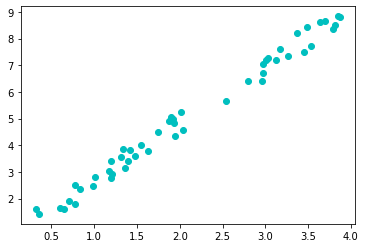

In [5]:
pyplot.plot(rand_x, rand_y, 'co')

Our goal is to calculate parameters $\theta_0$ and $\theta_1$ so that the drawn function will have the minimal loss (cost) function.

For convenience we will convert $\theta_0$ and $\theta_1$ as b and a respectively:
\begin{align}
f(x) & = b + ax
\end{align}

In [20]:
# Let's define our linear function as a lambda function in Python
b = 0 # Initially 0, will update later on
a = 0 # Initially 0, will update later on
fun_y = lambda x: b + a * x

$$a = a - \alpha \frac{1}{k} \sum_{i=1}^{k} ((f(x^{i}) - y^{i}) * x^{i})$$
$$b = b - \alpha \frac{1}{k} \sum_{i=1}^{k} (f(x^{i}) - y^{i})$$

Let's start by defining algorithm to formula 1 for calculating a.

In [50]:
def find_summation(fun_y, x_points, y_points):
    total1, total2 = 0, 0
    for i in range(0, len(x_points)):
        total1 += (fun_y(x_points[i]) - y_points[i]) * x_points[i]
        total2 += fun_y(x_points[i]) - y_points[i]
    return total1, total2

The above formulas calculate just the summation in the given algorithm, we still need to make the calculations for the formula that comes before the summation sign ($\sum$).

Let's write a function for this and repeat if few times.

In [78]:
alpha = .0001

In [84]:
a, b = 0, 0
for i in range(7000):
    summation = find_summation(fun_y, rand_x, rand_y)
    a -= alpha * summation[0] / len(rand_x)
    b -= alpha * summation[1] / len(rand_x)
print(f"Parameter a found: {a}")
print(f"Parameter b found: {b}")

Parameter a found: [2.03696016]
Parameter b found: [0.7069539]


After drawing a diagram using calculated variables a and b we can see the progress of learning algorithm over time.

In [85]:
def plot_line(fun_y, x):
    y = [fun_y(x) for x in x]
    pyplot.plot(x, y, 'r')
    pyplot.plot(rand_x, rand_y, 'co')

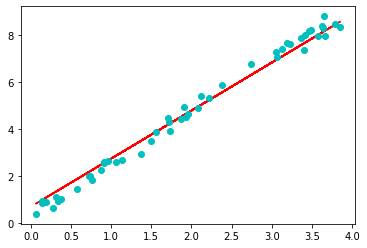

In [86]:
plot_line(fun_y, rand_x)

As we know the values a and b, we can formalize our function y using the following formula:
\begin{align}
f(x) & = 0.70695 + 2.03696x
\end{align}

Which can now be used to make some simple predictions.